The technical requirements for Project 1 are as follows.


 -Use Pandas to clean and format your data set(s) <br>
-Create a Jupyter Notebook describing the data exploration and cleanup process <br>
 -Create a Jupyter Notebook illustrating the final data analysis <br>
 -Use Matplotlib to create a total of 6-8 visualizations of your data (ideally, at least 2 per "question" you ask of your data) <br>
 -Save PNG images of your visualizations to distribute to the class and instructional team, and for inclusion in your presentation <br>
 -Optionally, use at least one API, if you can find an API with data pertinent to your primary research questions <br>
 -Create a write-up summarizing your major findings. This should include a heading for each "question" you asked of your data, and under each heading, a short description of what you found and any relevant plots.

In [13]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import seaborn as sns

# Census API Key
from config import api_key
c = Census(api_key, year = 2016)
#c.acs5.tables()

Question 1: Over a five year period, how has the annual income changed in these historically improvished areas of Houston....<br>
Question 2: Correlation between age ....<br>


In [2]:
# from census import Census
# from us import states

# c = Census(api_key)
# c.acs5.state(('NAME', 'B19013_001E'), states.TX.fips, year=2016)

In [14]:
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area:77009'})

census_pd = pd.DataFrame(census_data)

census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})


In [10]:
 #census_pd.head(10)

In [5]:
census_data 

[{'NAME': 'ZCTA5 77009',
  'B19013_001E': 49383.0,
  'B01003_001E': 37751.0,
  'B01002_001E': 35.1,
  'B19301_001E': 33167.0,
  'B17001_002E': 9148.0,
  'zip code tabulation area': '77009'}]

In [6]:
census_data[0]["NAME"]

'ZCTA5 77009'

In [7]:
# dictionary = {'NAME' : [],
#              "B19013_001E" : [],
#              "B01003_001E" : [],
#              "B01002_001E" : [],
#              "B19301_001E" : [],
#              "B17001_002E" : [],
#              "zip code tabulation area" : []}
# dictionary["NAME"] = 'Team7'
# dictionary

In [43]:
dictionary = {'NAME' : [],
             "B19013_001E" : [],
             "B01003_001E" : [],
             "B01002_001E" : [],
             "B19301_001E" : [],
             "B17001_002E" : [],
             "zip code tabulation area" : []}

hou_zips = ['77007', '77008', '77009']

for z in hou_zips:
    c = Census(api_key, year=2016)
    
    census_loop = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                              "B01002_001E", "B19301_001E",
                              "B17001_002E"), {'for': f'zip code tabulation area:{z}'})
#     print(census_loop)
    dictionary['NAME'].append(census_loop[0]['NAME'])
    dictionary['B19013_001E'].append(census_loop[0]["B19013_001E"])
    dictionary['B01003_001E'].append(census_loop[0]["B01003_001E"])
    dictionary['B01002_001E'].append(census_loop[0]["B01002_001E"])
    dictionary['B19301_001E'].append(census_loop[0]["B19301_001E"])
    dictionary['B17001_002E'].append(census_loop[0]["B17001_002E"])
    dictionary['zip code tabulation area'].append(census_loop[0]["zip code tabulation area"])

dictionary
                                               

{'NAME': ['ZCTA5 77007', 'ZCTA5 77008', 'ZCTA5 77009'],
 'B19013_001E': [113361.0, 88248.0, 47011.0],
 'B01003_001E': [35185.0, 32588.0, 38019.0],
 'B01002_001E': [33.6, 35.5, 34.5],
 'B19301_001E': [77957.0, 60908.0, 30474.0],
 'B17001_002E': [3156.0, 2299.0, 9905.0],
 'zip code tabulation area': ['77007', '77008', '77009']}

In [44]:
dict_pd = pd.DataFrame(dictionary)

dict_pd = dict_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

dict_pd

#Household Income = format into currency

#Per Capita Income

#zipcode should be the index(it like dupe info)

#what is the unit of measurement for poverty count???? 
  #description":"Number of persons whose income in the past 12 months is below the poverty level",
    #"text":"people living in poverty",

,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Zipcode
0,ZCTA5 77007,113361.0,35185.0,33.6,77957.0,3156.0,77007
1,ZCTA5 77008,88248.0,32588.0,35.5,60908.0,2299.0,77008
2,ZCTA5 77009,47011.0,38019.0,34.5,30474.0,9905.0,77009


In [16]:
dict_pd.describe()
##should probably do this by just each zip code....

,Household Income,Population,Median Age,Per Capita Income,Poverty Count
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,82873.333333,35264.000000,34.533333,56446.333333,5120.000000
std,33499.938900,2716.361721,0.950438,24053.870257,4166.027004
min,47011.000000,32588.000000,33.600000,30474.000000,2299.000000
25%,67629.500000,33886.500000,34.050000,45691.000000,2727.500000
50%,88248.000000,35185.000000,34.500000,60908.000000,3156.000000
75%,100804.500000,36602.000000,35.000000,69432.500000,6530.500000
max,113361.000000,38019.000000,35.500000,77957.000000,9905.000000


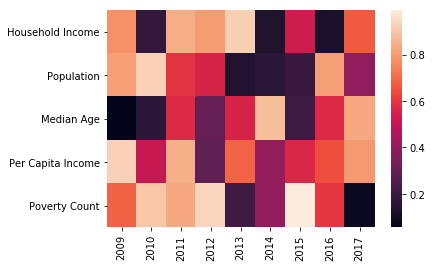

In [35]:
#https://stackoverflow.com/questions/35788626/how-to-plot-a-heatmap-from-pandas-dataframe/35793415
# create some random data; replace that by your actual dataset
data = pd.DataFrame(np.random.rand(9, 5), columns=['Household Income', 'Population', 'Median Age', 'Per Capita Income', 'Poverty Count'], index = range(2009, 2018, 1))

# plot heatmap
ax = sns.heatmap(data.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
#plt.savefig('seabornPandas.png', dpi=100)
plt.show()

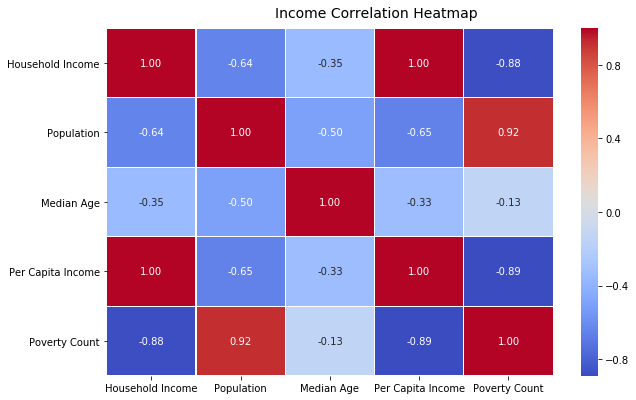

In [37]:
#https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = dict_pd.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

In [ ]:
ax = sns.violinplot(x="year", y="total_bill", data=tips)


